<a href="https://colab.research.google.com/github/MouliChintakunta-AI/DLTutors/blob/main/ReviseVectorizedBackpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer,StandardScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import time
from sklearn.datasets import make_blobs

In [28]:
data,labels = make_blobs(n_features = 2, n_samples= 1000,centers=4,random_state = 0)

In [29]:
np.random.seed(0)
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)

In [30]:
data.shape

(1000, 2)

In [31]:
labels.shape

(1000,)

In [32]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors=['blue','orange','purple','yellow','red','violet','green'])

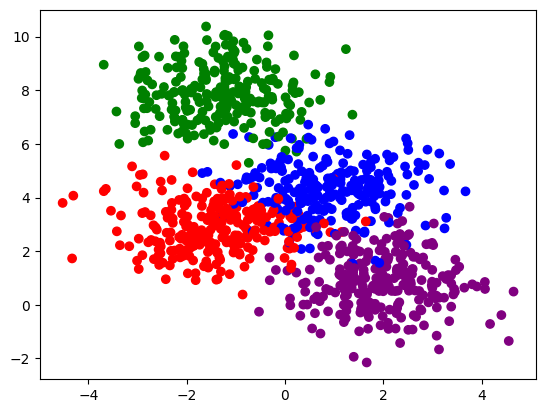

In [33]:
plt.scatter(data[:,0],data[:,1],c= labels,cmap=my_cmap)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify= labels,random_state = 0,test_size=.3)

In [35]:
lb = LabelBinarizer()
Y_train_oh = lb.fit_transform(Y_train)

In [36]:
class VectorizedBackpropagation:
  def __init__(self,W1,W2):
    self.W1 = W1
    self.W2 = W2
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self,x):
    return 1.0 / (1.0+np.exp(-x))

  def grad_sigmoid(self,x):
    return x*(1-x)

  def softmax(self,x):
    exp = np.exp(x)
    return exp/np.sum(exp)

  def forward_pass(self,x):
    X = x.reshape(1,-1)
    self.A1 = np.matmul(X,self.W1) + self.B1
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2
    self.H2 = self.softmax(self.A2)
    return self.H2

  def grad(self,x,y):
    X = x.reshape(1,-1)
    Y = y.reshape(1,-1)
    self.forward_pass(x)
    self.dA2 = self.H2 - y
    self.dW2 = np.matmul(self.H1.T,self.dA2)
    self.dB2 = self.dA2
    self.dH1 = np.matmul(self.dA2,self.W2.T)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))
    self.dW1 = np.matmul(X.T,self.dA1)
    self.dB1 = self.dA1

  def fit(self,X,Y,epochs = 2000,learning_rate = .5,display_loss = True,initialise= False):
    if display_loss:
      loss={}
    if initialise:
      self.W1 = W1
      self.W2 = W2
      self.B1 = np.zeros((1,2))
      self.B2 = np.zeros((1,4))
    for epoch in tqdm_notebook(range(epochs),desc="training vectorized backprop",unit='Epoch'):
      dw2 = np.zeros((2,4))
      dw1 = np.zeros((2,2))
      db1 = np.zeros((1,2))
      db2 = np.zeros((1,4))

      for x,y in zip(X,Y):
        self.grad(x,y)
        dw2 += self.dW2
        dw1 += self.dW1
        db1 += self.dB1
        db2 += self.dB2
      m = X.shape[0]

      self.W2 -= learning_rate * (dw2/m)
      self.W1 -= learning_rate * (dw1/m)
      self.B1 -= learning_rate * (db1/m)
      self.B2 -= learning_rate * (db2/m)

      y_pred = self.predict(X)
      if display_loss:
        loss[epoch] = log_loss(Y,y_pred)
    if display_loss:
      plt.xlabel("Epochs")
      plt.ylabel("LogLoss")
      plt.plot(loss.values())
      plt.show()

  def predict(self,X):
    y_pred = []
    for x in X:
      y_predicted = self.forward_pass(x)
      y_pred.append(y_predicted)
    return np.array(y_pred).squeeze()



<ipython-input-36-50cb35e07c84>:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc="training vectorized backprop",unit='Epoch'):


training vectorized backprop:   0%|          | 0/2000 [00:00<?, ?Epoch/s]

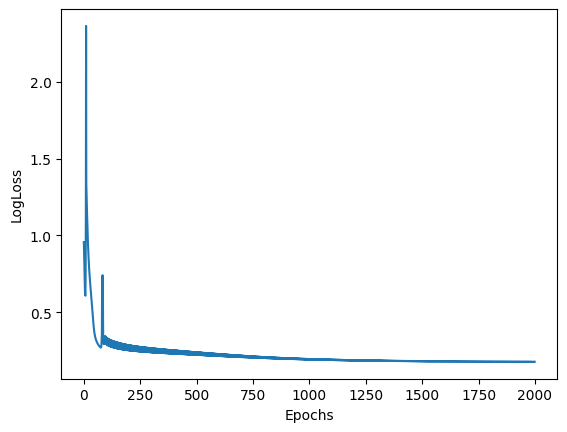

In [68]:
model = VectorizedBackpropagation(W1,W2)
model.fit(X_train,Y_train_oh,epochs= 2000, learning_rate = .5)

In [67]:
log_loss(Y_train_oh,model.predict(X_train))

1.6895971431978947

In [39]:
np.sum([[1,2],[3,4]],axis = 0)

array([4, 6])

# Input + vectorized backpropagation

In [62]:
class InputVectorizedbackpropagation:
  def __init__(self,W1,W2):
    self.W1 = W1
    self.W2 = W2
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self,X):
    return 1.0 /(1.0 + np.exp(-X))

  def grad_sigmoid(self,X):
    return X*(1-X)

  def softmax(self,X):
    exp = np.exp(X)
    return exp/np.sum(exp,axis=1).reshape(-1,1)

  def forward_pass(self,X):
    self.A1 = np.matmul(X,self.W1)+self.B1
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1,self.W2)+self.B2
    self.H2 = self.softmax(self.A2)
    return self.H2

  def grad(self,X,Y):
    self.forward_pass(X)
    self.dA2 = self.H2 - Y
    self.dW2 = np.matmul(self.H1.T,self.dA2)
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1)
    self.dH1 = np.matmul(self.dA2,self.W2.T)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))
    self.dW1 = np.matmul(X.T,self.dA1)
    self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1)

  def fit(self,X,Y,epochs = 2000,learning_rate = .25,display_loss =True):
    if display_loss:
      loss ={}
    for epoch in tqdm_notebook(range(epochs),desc="trainig InputVectorized Backprop",unit = 'Epoch'):
      self.grad(X,Y)
      m = X.shape[0]
      self.W2 -= learning_rate * ( self.dW2/m)
      self.W1 -= learning_rate * ( self.dW1/m)
      self.B2 -= learning_rate * ( self.dB2/m)
      self.B1 -= learning_rate * ( self.dB1/m)
      y_pred = self.predict(X)
      if display_loss:
        loss[epoch] = log_loss(Y,y_pred)
    if display_loss:
      plt.xlabel("Epochs")
      plt.ylabel("LogLoss")
      plt.plot(loss.values())
      plt.show()
  def predict(self,X):
    y_pred = []
    y_prediction = self.forward_pass(X)
    return y_prediction.squeeze()




<ipython-input-62-d0c2517643cd>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc="trainig InputVectorized Backprop",unit = 'Epoch'):


trainig InputVectorized Backprop:   0%|          | 0/2000 [00:00<?, ?Epoch/s]

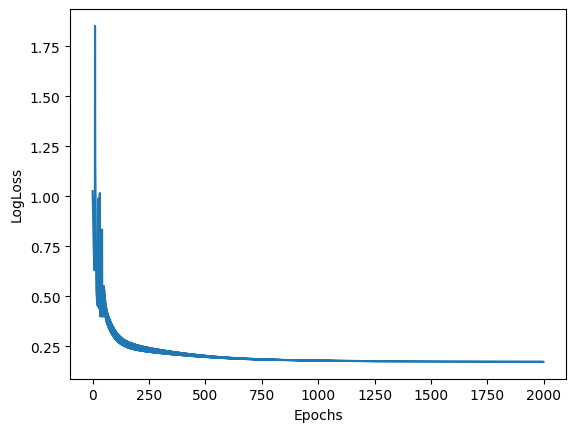

In [69]:
model2 = InputVectorizedbackpropagation(W1,W2)
model2.fit(X_train,Y_train_oh,2000,0.5)

<ipython-input-36-50cb35e07c84>:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc="training vectorized backprop",unit='Epoch'):


training vectorized backprop:   0%|          | 0/2000 [00:00<?, ?Epoch/s]

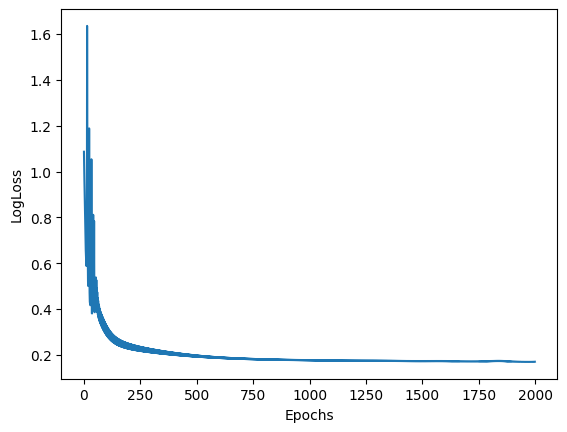

Time taken by Model  0  is: 170.35149788856506


<ipython-input-62-d0c2517643cd>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc="trainig InputVectorized Backprop",unit = 'Epoch'):


trainig InputVectorized Backprop:   0%|          | 0/2000 [00:00<?, ?Epoch/s]

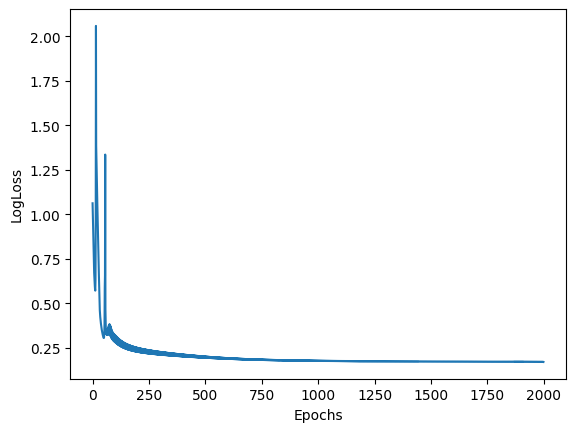

Time taken by Model  1  is: 9.89787745475769


In [70]:
models_to_try = [VectorizedBackpropagation(W1,W2),InputVectorizedbackpropagation(W1,W2)]
fitted_models = []
for idx,model in enumerate(models_to_try):
  tic = time.time()
  model.fit(X_train,Y_train_oh,epochs=2000,learning_rate=.5)
  fitted_models.append(model)
  toe = time.time()
  print("Time taken by Model ",idx," is:", toe-tic)


In [72]:
for idx,model in enumerate(fitted_models):
  y_train_pred_ = model.predict(X_train)
  y_train_labels = np.argmax(y_train_pred_,1)
  print("Model ",idx,"Train accuracy score is:",accuracy_score(y_train_labels,Y_train))
  y_test_pred_ = model.predict(X_test)
  y_test_labels = np.argmax(y_test_pred_,1)
  print("Model ",idx,"Train accuracy score is:",accuracy_score(y_test_labels,Y_test))

Model  0 Train accuracy score is: 0.9271428571428572
Model  0 Train accuracy score is: 0.93
Model  1 Train accuracy score is: 0.9242857142857143
Model  1 Train accuracy score is: 0.9366666666666666


In [46]:
print(np.zeros((1,4)))

[[0. 0. 0. 0.]]


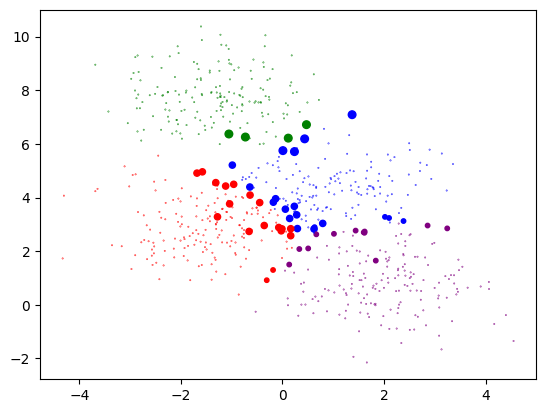

In [76]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train_labels,cmap=my_cmap,s = 10* np.abs(Y_train-y_train_labels)+.1)